# Pre-Processing
- Adjust for skewed data: standardize
- Impute Missing data
- Can be passed into the train() function to standardize all Predictors

In [1]:
library(caret)
library(kernlab) #spam dataset
data(spam)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



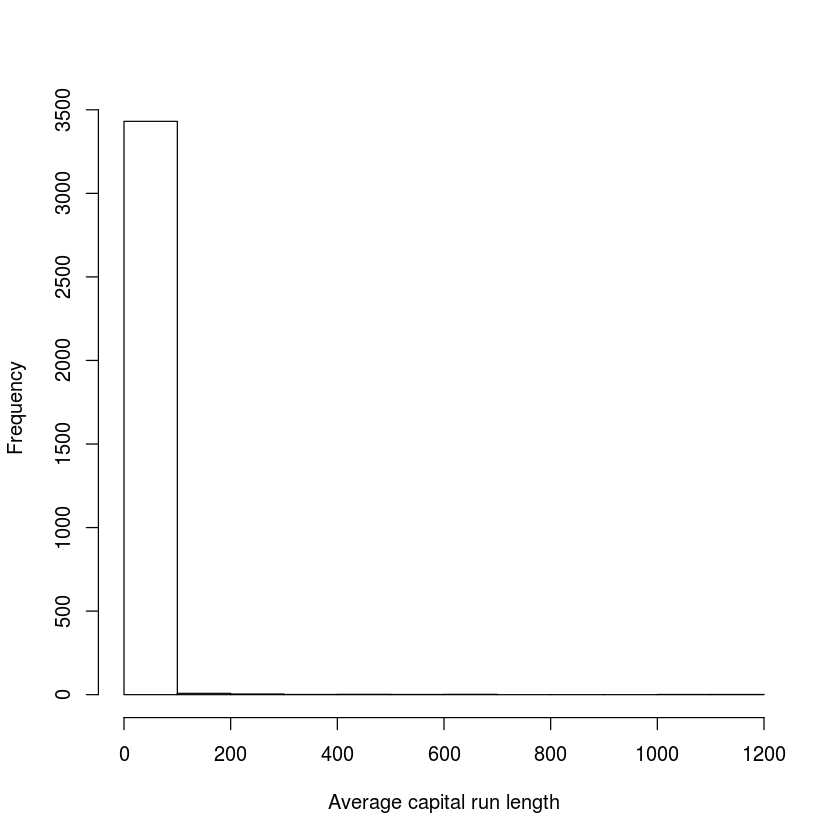

In [5]:
# Split based on type
set.seed(32323)
inTrain <- createDataPartition(y = spam$type, p = 0.75, list = FALSE)
training <- spam[inTrain,]
testing <- spam[-inTrain,]

# Look at capitalAve Variable: skewed (too many small run lengths, with few large ones)
hist(training$capitalAve, main = "", xlab = "Average capital run length")

## Preprocess Manually
- Small Mean and Large SD

In [6]:
paste("mean:", mean(training$capitalAve))
paste("sd:", sd(training$capitalAve))

[1] "mean: 5.68948420747609"

[1] "sd: 36.0709064796029"

In [7]:
# Standardize Training set
# Mean will be 0, Sd will be 1
trainCapAveStd <- (training$capitalAve - mean(training$capitalAve)) / sd(training$capitalAve)
paste("mean:", mean(trainCapAveStd))
paste("sd:", sd(trainCapAveStd))

[1] "mean: -1.11325096001001e-17"

[1] "sd: 1"

## When Applying to the Test Dataset, apply parameters used for Training set
- Mean won't be exactly 0, and SD won't be exactly 1

In [8]:
# Standardize Testing set
testCapAveStd <- (testing$capitalAve - mean(training$capitalAve)) / sd(training$capitalAve)
paste("mean:", mean(testCapAveStd))
paste("sd:", sd(testCapAveStd))

[1] "mean: -0.0552331399266053"

[1] "sd: 0.304738927818326"

<hr>

## Use preProcess() function to Standardize
- Pass all Variable except for the last (type)
- Create preProcess Object
- Use that Object to predict
- Use that Object to predict on Testing set as well

In [14]:
preObj <- preProcess(training[, -58], method = c("center", "scale"))
preObj

Created from 3451 samples and 57 variables

Pre-processing:
  - centered (57)
  - ignored (0)
  - scaled (57)


In [15]:
trainCapAveStd <- predict(preObj, training[, -58])$capitalAve
head(trainCapAveStd)

[1] -0.05360232 -0.01595425 -0.05967369 -0.05967369 -0.07456104 -0.08980878

In [16]:
paste("mean:", mean(trainCapAveStd))
paste("sd:", sd(trainCapAveStd))

[1] "mean: -1.11325096001001e-17"

[1] "sd: 1"

## Standardize the Testing Set

In [17]:
testCapAveStd <- predict(preObj, testing[, -58])$capitalAve
head(testCapAveStd)

paste("mean:", mean(testCapAveStd))
paste("sd:", sd(testCapAveStd))

[1]  0.1145387 -0.1114051  0.1124040 -0.1213578 -0.1030882 -0.0230791

[1] "mean: -0.0552331399266053"

[1] "sd: 0.304738927818326"

## Look at Standardize distribution

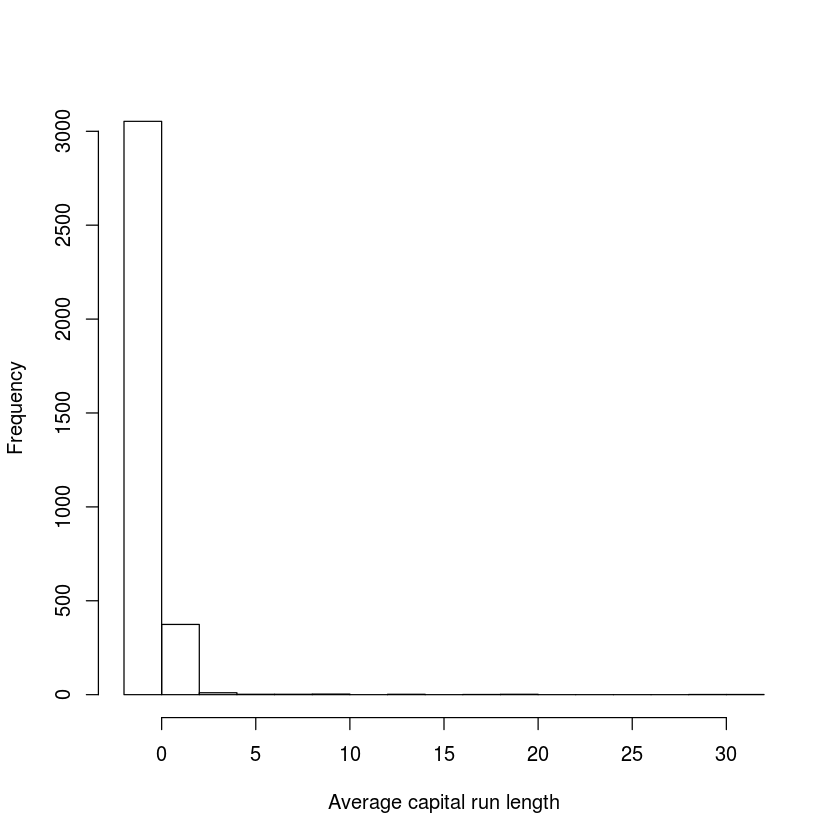

In [18]:
hist(trainCapAveStd, main = "", xlab = "Average capital run length")

<hr>

# Standardizing - Box-Cox transforms
- Transform continuous data into normal data
- Not perfect normal distribution but close

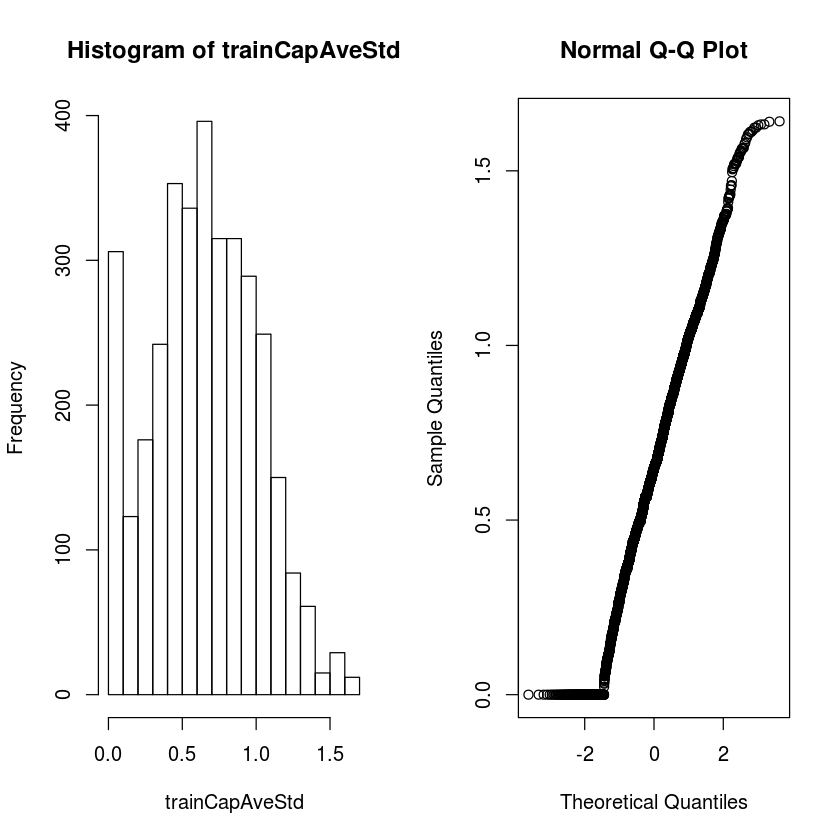

In [21]:
preObj <- preProcess(training[, -58], method = c("BoxCox"))
trainCapAveStd <- predict(preObj, training[, -58])$capitalAve

par(mfrow = c(1,2))
hist(trainCapAveStd)
qqnorm(trainCapAveStd)